- 온라인, 오프라인 카드 사용 내역 데이터 확인
    1. csv폴더 안의 오프라인, 온라인 파일 로드
    2. 두 개의 데이터 프레임 단순 행 결합(유니언 결합)
        - 두 개의 데이터 프레임 구조 파악
        - 두 개의 데이터프레임의 구조를 같은 형태로 변환
        - 유니언 결합
    3. 기준년월 컬럼의 데이터를 시계열 데이터로 변경
    4. 기준년월, 업종별 총이용금액의 합계를 그래프 표시

In [1]:
from datetime import datetime
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import platform

In [3]:
if platform.system() == 'Darwin' :
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [4]:
offline = pd.read_csv('../../../../바탕 화면/Data/csv/card/오프라인.csv', encoding='cp949')
online = pd.read_csv('../../../../바탕 화면/Data/csv/card/온라인.csv')

In [5]:
## pandas에서 지수표현식 없애기
pd.options.display.float_format = '{:2f}'.format

In [6]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   crym          2648 non-null   int64  
 1   tco_btc_nm    2648 non-null   object 
 2   ma_fem_dc     2648 non-null   int64  
 3   agegrp_dc     2648 non-null   int64  
 4   tco_btc_u_ct  2648 non-null   int64  
 5   tco_btc_u_am  2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [7]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   crym          651 non-null    int64
 1   ma_fem_dc     651 non-null    int64
 2   agegrp_dc     651 non-null    int64
 3   tco_btc_u_ct  651 non-null    int64
 4   tco_btc_u_am  651 non-null    int64
dtypes: int64(5)
memory usage: 25.6 KB


In [8]:
offline.columns=['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
offline

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6283353303.000000
2644,202109,편의점,2,60,243768,1997441975.000000
2645,202109,편의점,2,70,40523,352420260.000000
2646,202109,편의점,2,80,6349,53334882.000000


In [9]:
online.columns=['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
online

,기준년월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337
...,...,...,...,...,...
646,202109,2,50,3237324,181360535814
647,202109,2,60,1019719,70026626874
648,202109,2,70,159261,13091029631
649,202109,2,80,20094,1935122483


In [10]:
online['업종']='온라인'
online


,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,201901,1,1,1,110685,온라인
1,201901,1,10,2333,98108225,온라인
2,201901,1,20,272915,13854081656,온라인
3,201901,1,30,1320227,82946127640,온라인
4,201901,1,40,1372052,95550848337,온라인
...,...,...,...,...,...,...
646,202109,2,50,3237324,181360535814,온라인
647,202109,2,60,1019719,70026626874,온라인
648,202109,2,70,159261,13091029631,온라인
649,202109,2,80,20094,1935122483,온라인


In [11]:
df=pd.concat([offline,online], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    3299 non-null   int64  
 1   업종      3299 non-null   object 
 2   성별      3299 non-null   int64  
 3   연령대     3299 non-null   int64  
 4   총이용건수   3299 non-null   int64  
 5   총이용금액   3299 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 180.4+ KB


In [12]:
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3299 entries, 0 to 650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    3299 non-null   datetime64[ns]
 1   업종      3299 non-null   object        
 2   성별      3299 non-null   int64         
 3   연령대     3299 non-null   int64         
 4   총이용건수   3299 non-null   int64         
 5   총이용금액   3299 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 180.4+ KB


In [13]:
df2=df.copy()

In [14]:
# 성별 컬럼의 데이터 1=남자 2=여자
df2['성별'].replace(
    {
        1: '남자',
        2: '여자',
        9: '무관'
        }
)
df2

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
646,2021-09-01,온라인,2,50,3237324,181360535814.000000
647,2021-09-01,온라인,2,60,1019719,70026626874.000000
648,2021-09-01,온라인,2,70,159261,13091029631.000000
649,2021-09-01,온라인,2,80,20094,1935122483.000000


In [15]:
## map() + (인원함수 | lambda 함수)
def change(x):
    if x ==1:
        return'남자'
    elif x == 2:
        return  '여자'

df2['성별'].map(change)


0      남자
1      남자
2      남자
3      남자
4      남자
       ..
646    여자
647    여자
648    여자
649    여자
650    여자
Name: 성별, Length: 3299, dtype: object

In [16]:
# if 구문을 한줄로 표시 : 참인 경우 return 데이터 if(조건식) else 거짓인 경우 return 데이터
df2['성별'].map(
    lambda x : '여자' if (x==2) else ('남자' if (x==1) else '무관')
)

0      남자
1      남자
2      남자
3      남자
4      남자
       ..
646    여자
647    여자
648    여자
649    여자
650    여자
Name: 성별, Length: 3299, dtype: object

In [17]:
# for 문
df2.reset_index(drop=True, inplace=True)

In [18]:

for i in range(len(df)):
    gender = df2['성별'][i]
    if gender == 1:
        df2['성별'][i] = '남자'
    elif gender == 2:
        df2['성별'][i] = '여자'
    else:
        df2['성별'][i] = '무관'
    

C:\Users\skh13\AppData\Local\Temp\ipykernel_944\2326001003.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['성별'][i] = '남자'
C:\Users\skh13\AppData\Local\Temp\ipykernel_944\2326001003.py:4: SettingWithCopyWarning: 
A value is trying to

In [19]:
df2

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,남자,1,1,7600.000000
1,2019-01-01,백화점,남자,10,379,19458720.000000
2,2019-01-01,백화점,남자,20,45173,4747711001.000000
3,2019-01-01,백화점,남자,30,271858,27918261543.000000
4,2019-01-01,백화점,남자,40,391109,37911486656.000000
...,...,...,...,...,...,...
3294,2021-09-01,온라인,여자,50,3237324,181360535814.000000
3295,2021-09-01,온라인,여자,60,1019719,70026626874.000000
3296,2021-09-01,온라인,여자,70,159261,13091029631.000000
3297,2021-09-01,온라인,여자,80,20094,1935122483.000000


In [20]:
mean_df = df2[
    ['기준년월', '업종', '총이용금액']].groupby(
        ['기준년월', '업종']
).sum()

mean_df

총이용금액
기준년월       업종                       
2019-01-01 백화점   455895539087.000000
           슈퍼마켓  173613089088.000000
           온라인   778281658966.000000
           편의점    44083584621.000000
           할인점   198171780041.000000
...                              ...
2021-09-01 백화점   422081236462.000000
           슈퍼마켓  181809468875.000000
           온라인  1195275255905.000000
           편의점    61362822910.000000
           할인점   151079584433.000000

[165 rows x 1 columns]

In [21]:
mean_df2=df2.groupby(
    ['기준년월', '업종']
).sum()['총이용금액']

In [22]:
mean_df2   # series 형태

기준년월        업종  
2019-01-01  백화점     455895539087.000000
            슈퍼마켓    173613089088.000000
            온라인     778281658966.000000
            편의점      44083584621.000000
            할인점     198171780041.000000
                           ...         
2021-09-01  백화점     422081236462.000000
            슈퍼마켓    181809468875.000000
            온라인    1195275255905.000000
            편의점      61362822910.000000
            할인점     151079584433.000000
Name: 총이용금액, Length: 165, dtype: float64

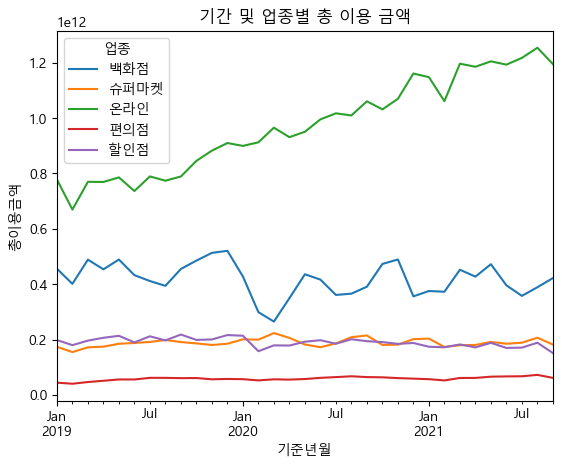

In [23]:
result_unstacked = mean_df2.unstack()


result_unstacked.plot()

plt.ylabel('총이용금액')
plt.title('기간 및 업종별 총 이용 금액')

plt.show()

In [24]:
## pivot table
pivot_result=mean_df.pivot_table(
    index='기준년월',
    columns='업종',
    values='총이용금액',
    aggfunc='sum'
)

<Axes: xlabel='기준년월'>

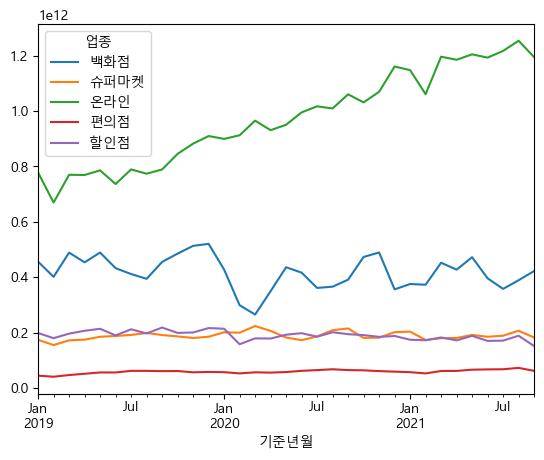

In [25]:
pivot_result.plot()

In [26]:
## 전체 확산 데이터
result_unstacked['온/오프라인']=result_unstacked.sum(axis=1)

<Axes: xlabel='기준년월'>

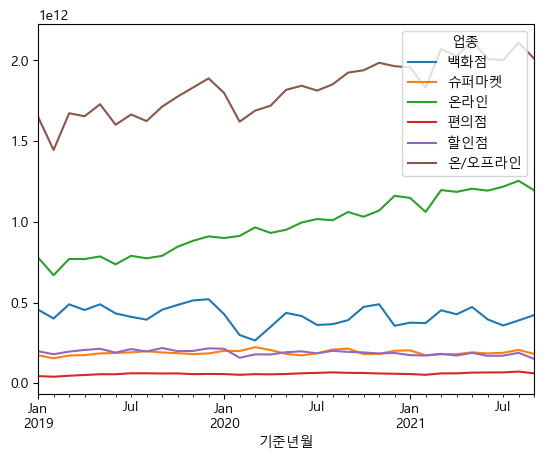

In [27]:
result_unstacked.plot()

In [28]:
result_unstacked['오프라인']=result_unstacked['온/오프라인']-result_unstacked['온라인']

<Axes: xlabel='기준년월'>

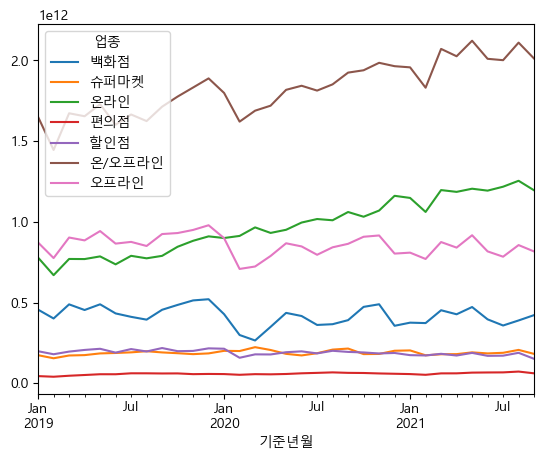

In [29]:
result_unstacked.plot()

In [30]:
mean_df

총이용금액
기준년월       업종                       
2019-01-01 백화점   455895539087.000000
           슈퍼마켓  173613089088.000000
           온라인   778281658966.000000
           편의점    44083584621.000000
           할인점   198171780041.000000
...                              ...
2021-09-01 백화점   422081236462.000000
           슈퍼마켓  181809468875.000000
           온라인  1195275255905.000000
           편의점    61362822910.000000
           할인점   151079584433.000000

[165 rows x 1 columns]

<Axes: xlabel='기준년월'>

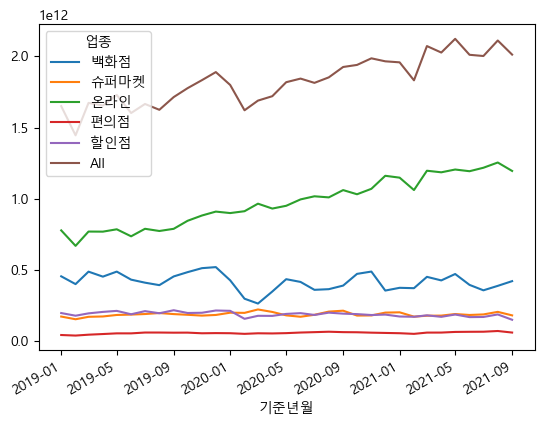

In [31]:
pivot_result2=df2.pivot_table(
    index='기준년월',
    columns='업종',
    values='총이용금액',
    aggfunc='sum',
    margins=True
)

pivot_result2.drop('All', axis=0).plot()

In [32]:
pivot_result2['오프라인']=pivot_result2['All']-pivot_result2['온라인']

In [33]:
data=pivot_result2.iloc[:-1]

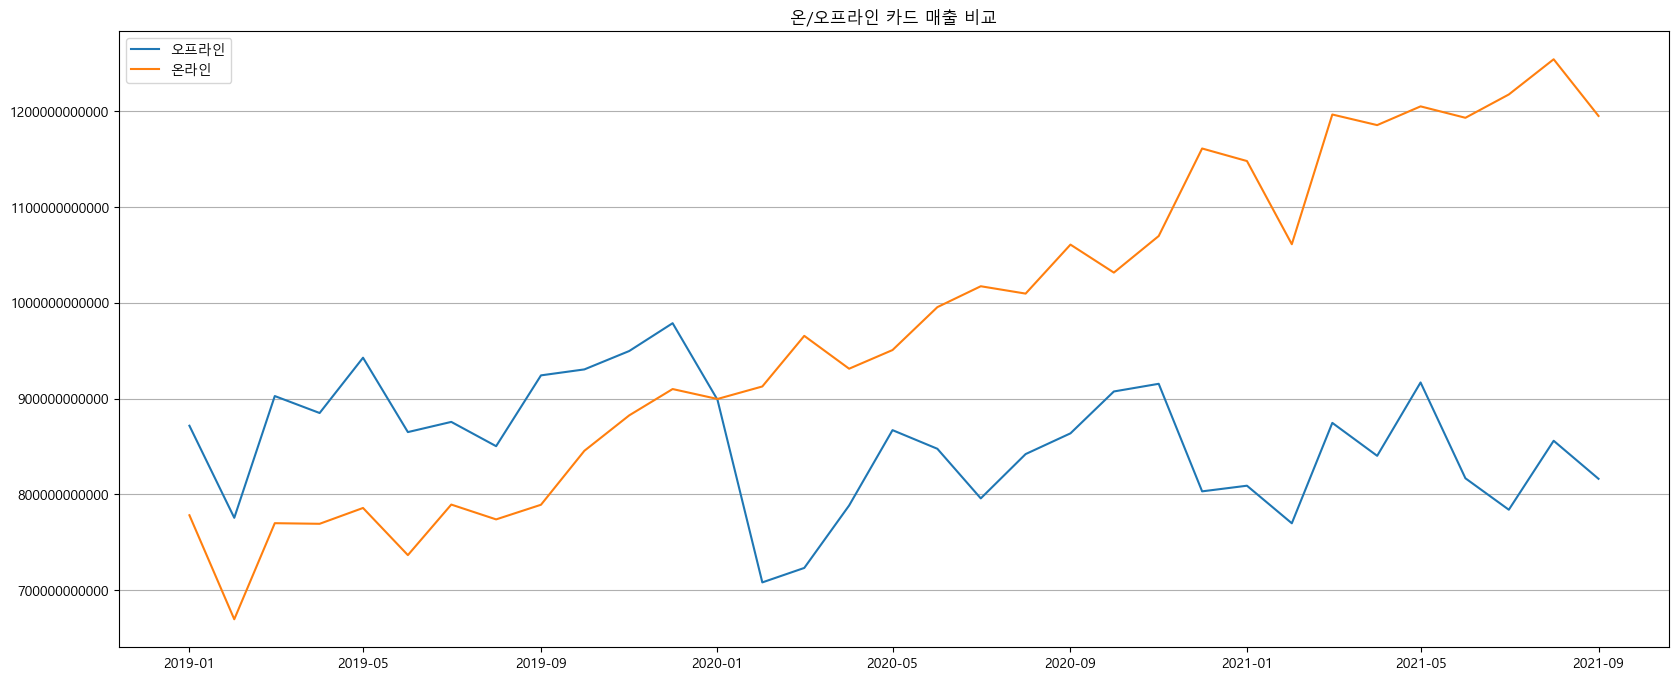

In [34]:
x=data.index
y1=data['오프라인']
y2=data['온라인']


plt.figure(figsize=(20,8))

plt.ticklabel_format(axis='y', style='plain',)  # 지수표현 제거

plt.grid(True, axis='y')   # y축 그리드선 추가

plt.plot(x,y1, label='오프라인')
plt.plot(x,y2, label='온라인')

plt.title("온/오프라인 카드 매출 비교")
plt.legend()

plt.show()


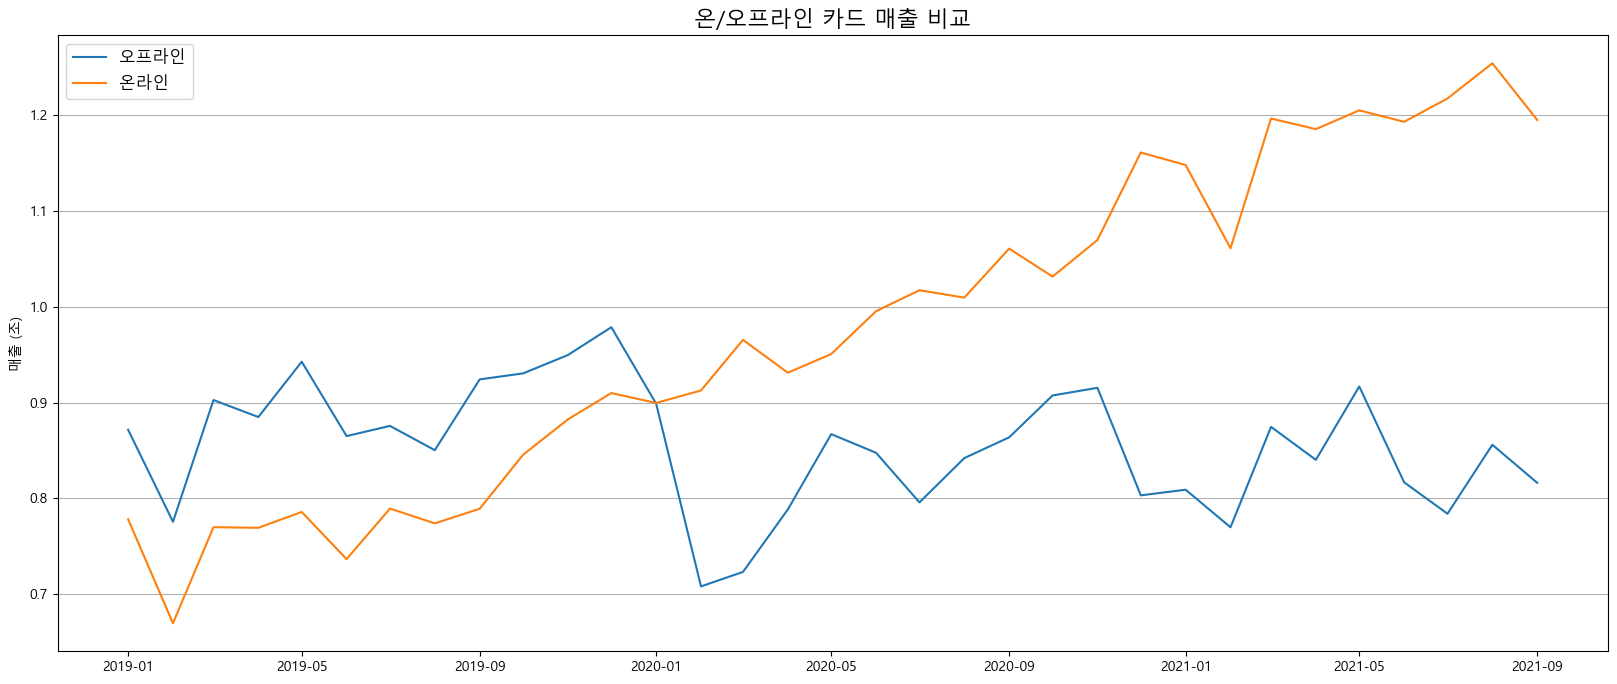

In [35]:
import matplotlib.pyplot as plt

# Your data and plot code
x = data.index
y1 = data['오프라인']
y2 = data['온라인']

# Dividing by 1,000,000 to convert values to millions
y1_millions = y1 / 1000000000000
y2_millions = y2 / 1000000000000

plt.figure(figsize=(20, 8))

# Shorten the label format on the y-axis
plt.ticklabel_format(axis='y', style='plain')  

plt.grid(True, axis='y')   # Add gridlines for the y-axis

plt.plot(x, y1_millions, label='오프라인')
plt.plot(x, y2_millions, label='온라인')

# Add "()" next to the y-axis label
plt.ylabel('매출 (조)')

# Customize title and legend text size
plt.title("온/오프라인 카드 매출 비교", fontsize=16)  # Set title font size
plt.legend(fontsize=12)  # Set legend font size

plt.show()


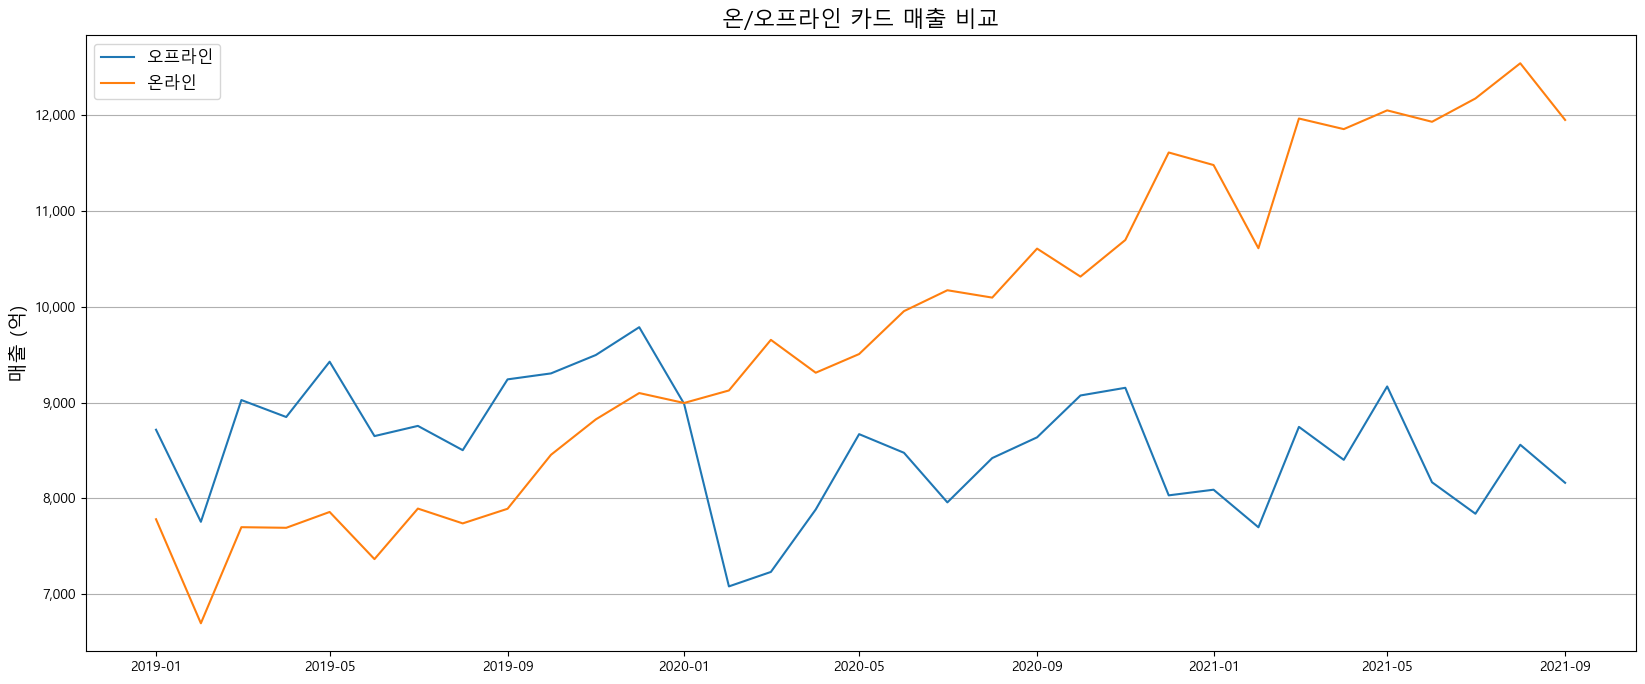

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter

x = data.index
y1 = data['오프라인']
y2 = data['온라인']

# Dividing by 1,000,000 to convert values to millions
y1_millions = y1 / 100000000
y2_millions = y2 / 100000000

plt.figure(figsize=(20, 8))

# Shorten the label format on the y-axis
plt.ticklabel_format(axis='y', style='plain', useOffset=False)  

plt.grid(True, axis='y')   # Add gridlines for the y-axis

plt.plot(x, y1_millions, label='오프라인')
plt.plot(x, y2_millions, label='온라인')

# Add commas to y-axis tick labels
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

# Add "(백만)" next to the y-axis label
plt.ylabel('매출 (억)', fontsize=14, rotation=90)  # Set ylabel font size

# Customize title and legend text size
plt.title("온/오프라인 카드 매출 비교", fontsize=16)  # Set title font size
plt.legend(fontsize=12)  # Set legend font size

plt.show()
